<a href="https://colab.research.google.com/github/likhithsaipadala/Task6-1-.py/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [9]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

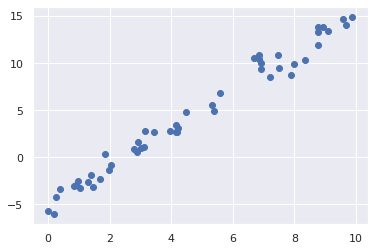

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

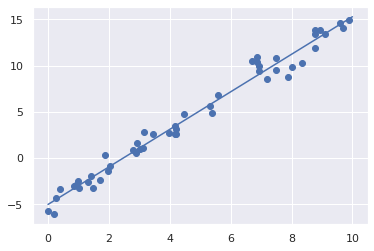

In [13]:
from sklearn.linear_model import LinearRegression
df = LinearRegression(fit_intercept=True)

df.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = df.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [14]:
print("Model slope:    ", df.coef_[0])
print("Model intercept:", df.intercept_)


Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


In [15]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [4]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [8]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [13]:
# helper function to perform univariate analysis
def univariate(feat):
    count = df[feat].value_counts()
       
    print("--------------------" + feat + " Distribution (counts)------------------")
    print(count)

    print("--------------------" + feat + " Distribution (in %)------------------")    
    if feat == "region":
        val1 = count.values[0]
        val2 = count.values[1]
        val3 = count.values[2]
        val4 = count.values[3]
    else:
        val1 = count.values[0]
        val2 = count.values[1]

    
    if feat == "region":
        print("% of " + count.index[0] + ":", (val1/df.shape[0]) * 100)
        print("% of " + count.index[1] + ":", (val2/df.shape[0]) * 100)
        print("% of " + count.index[2] + ":", (val3/df.shape[0]) * 100)
        print("% of " + count.index[3] + ":", (val4/df.shape[0]) * 100)
    else:
        print("% of " + count.index[0] + ":", (val1/df.shape[0]) * 100)
        print("% of " + count.index[1] + ":", (val2/df.shape[0]) * 100)

    # lets visualize what we discussed above
    plt.figure(figsize = (8,6))
    if feat == "region":
        plt.bar(count.index, count.values,color = ['g','b','y','r'])
    else:
        plt.bar(count.index, count.values,color = ['g','b'])
        
    plt.show()

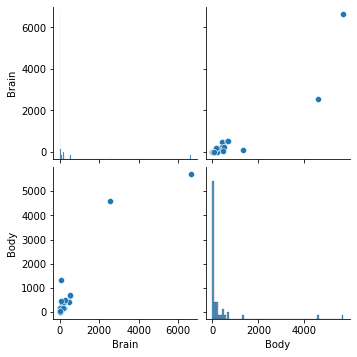

In [16]:
sns.pairplot(df)

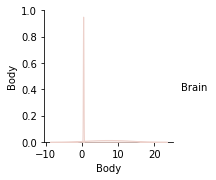

In [17]:
sns.pairplot(df,hue="Brain")

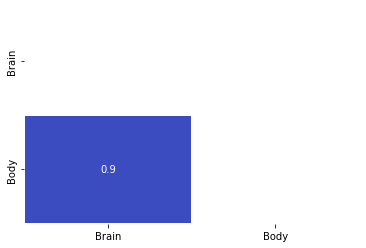

In [18]:
corrMatrix = df.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',            
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [30]:
df1 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [31]:
df1 = pd.read_csv("/content/salary.txt")
df1.head()

,0 3 25 1 35 36350
0,0 3 13 1 22 35350
1,0 3 10 1 23 28200
2,1 3 7 1 27 26775
3,0 3 19 0 30 33696
4,0 3 16 1 21 28516


In [24]:
df1.shape

(51, 1)

In [27]:
df1.isnull().sum()

       0    3    25    1    35    36350    0
dtype: int64

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 1 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0          0    3    25    1    35    36350  51 non-null     object
dtypes: object(1)
memory usage: 536.0+ bytes


In [29]:
for col in df1.columns:
    print(Fore.BLUE + "Feature Name:",col,Style.RESET_ALL)
    print(Fore.YELLOW + "",df1[col].describe(),Style.RESET_ALL)
    print(Fore.RED + "-------------------------------------------------")
    print("-------------------------------------------------",Style.RESET_ALL)

Feature Name:        0    3    25    1    35    36350 
 count                                          51
unique                                         51
top              0    3    13    1    22    35350
freq                                            1
Name:        0    3    25    1    35    36350, dtype: object 
-------------------------------------------------
------------------------------------------------- 
